In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'



In [17]:
df = pd.read_csv(r'./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [20]:
df['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [21]:
df['Spending Score (1-100)']

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [22]:
df.Age

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Agglom

In [24]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)

In [25]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [26]:
random_state = 42
n_clusters=5

agglom = AgglomerativeClustering(n_clusters, linkage='average').fit(X)


X['Labels'] = agglom.labels_

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9528\928532069.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {cluster_label + 1}')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9528\928532069.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {cluster_label + 1}')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9528\928532069.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integ

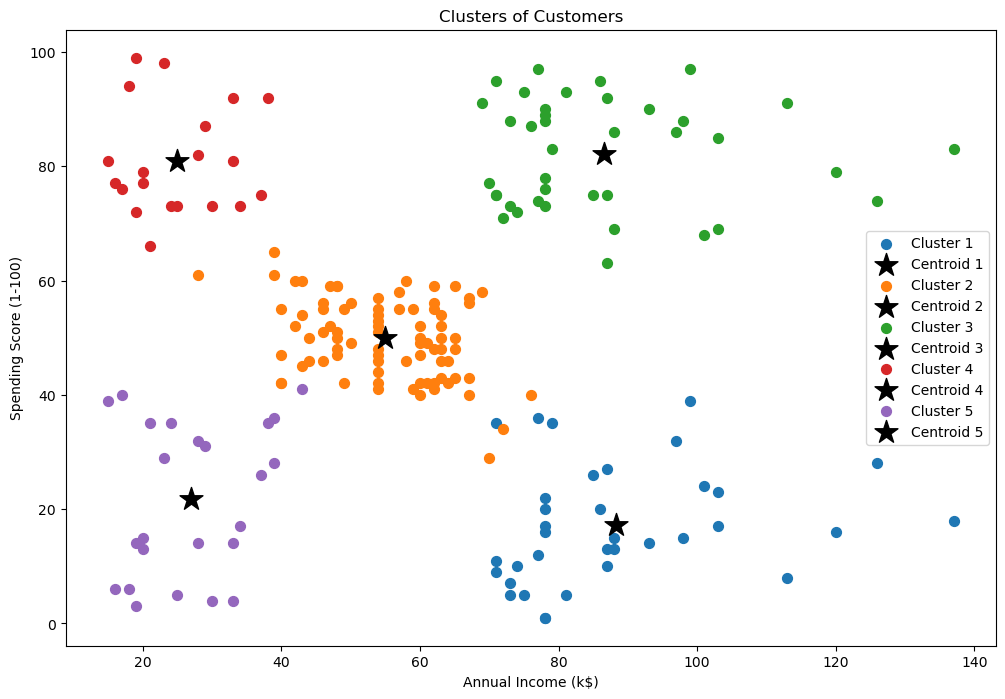

In [27]:
# Plot the clusters
plt.figure(figsize=(12, 8))
for cluster_label in range(n_clusters):  
    # Extract points belonging to the current cluster
    cluster_points = X[X['Labels'] == cluster_label]
    
    # Calculate the centroid as the mean position of the data points in the cluster
    centroid = cluster_points[['Income', 'Score']].mean(axis=0)
    
    # Plot points for the current cluster
    plt.scatter(cluster_points['Income'], cluster_points['Score'],
                s=50, label=f'Cluster {cluster_label + 1}')
    
    # Plot the centroid
    plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {cluster_label + 1}')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


In [28]:
# Calculate silhouette score
silhouette = silhouette_score(X[['Income', 'Score']], agglom.labels_)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.5434303671343073


In [29]:

# Calculate Davies–Bouldin index
davies_bouldin = davies_bouldin_score(X[['Income', 'Score']], agglom.labels_)
print(f"Davies–Bouldin Index: {davies_bouldin}")

Davies–Bouldin Index: 0.5862248473281118


In [30]:
import pickle
pickle.dump(agglom, open('model_agglo.pkl', 'wb'))